In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
print('Libraries imported successfully')

Libraries imported successfully


In [2]:
df = pd.read_csv('/FuelConsumptionCo2.csv')
print('Dataset imported successfully')
df.shape
df.head()
df.info()
df.corr()


Dataset imported successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5

<ipython-input-2-4e1f84711926>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [3]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
print('Dataframe CDF created successfully')
cdf.head()
cdf.corr()

Dataframe CDF created successfully


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.776788,0.849685
FUELCONSUMPTION_COMB,0.819482,0.776788,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.892129,1.000000


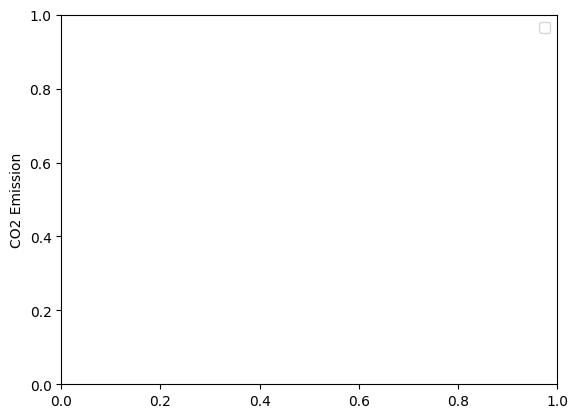

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.ylabel('CO2 Emission')
plt.legend(('Engine Size', 'Cylinders', 'Fuel Consupmtion'))
plt.show()

In [10]:
x = cdf.iloc[:,0:3]
y = cdf.CO2EMISSIONS
y = y.to_frame()
x.head()
y.head()

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)
print ('x_train quantity: ', len(x_train))
print ('y_train quantity: ', len(y_train))
print ('x_test quantity: ', len(x_test))
print ('y_test quantity: ', len(y_test))

x_train quantity:  853
y_train quantity:  853
x_test quantity:  214
y_test quantity:  214


In [12]:
lm = LinearRegression()
lm.fit(x_train, y_train)
lm.intercept_

array([63.8617595])

In [13]:
lm.coef_
yhat = lm.predict(x_test)
lm.score(x_test, y_test)


0.8554869824259079

In [14]:
yhatdf = pd.DataFrame(yhat)
yhatdf.columns = ['PredictedValues']
yhatdf = yhatdf.PredictedValues.astype(int).to_frame()
actualval = y_test
actualval.columns = ['ActualValues']
lastdf = pd.concat([yhatdf.reset_index(drop=True), actualval.reset_index(drop=True)], axis = 1, sort = False)
lastdf

,PredictedValues,ActualValues
0,201,202
1,199,202
2,209,221
3,190,191
4,227,232
...,...,...
209,392,344
210,247,251
211,211,225
212,255,248


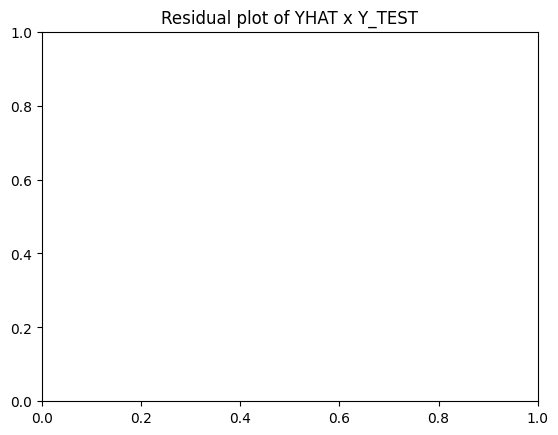

In [17]:
import seaborn as sns

plt.title('Residual plot of YHAT x Y_TEST')
plt.show()

<ipython-input-18-301edb283d4a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist = False, label = 'Actual values')
<ipython-input-18-301edb283d4a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat, hist = False, label = 'Predicted values')


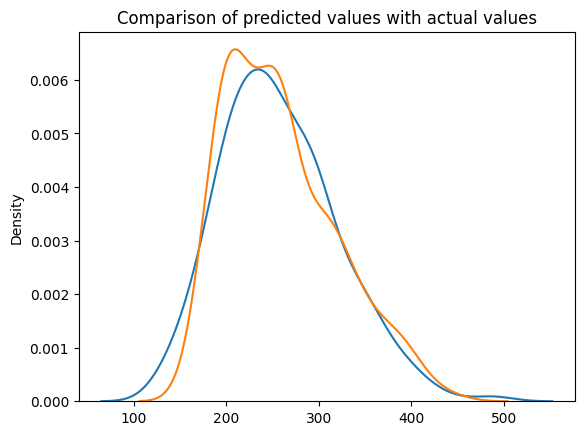

In [18]:
sns.distplot(y_test, hist = False, label = 'Actual values')
sns.distplot(yhat, hist = False, label = 'Predicted values')
plt.title('Comparison of predicted values with actual values')
plt.show()